Demo of Recurrent Neural Network using Keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

Download Tesla stock data

In [2]:
df = pd.read_csv('./TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


We will only be caring about the 'Open' values of the stock each day.

In [3]:
data = df['Open'].values
data = data.reshape(-1, 1)

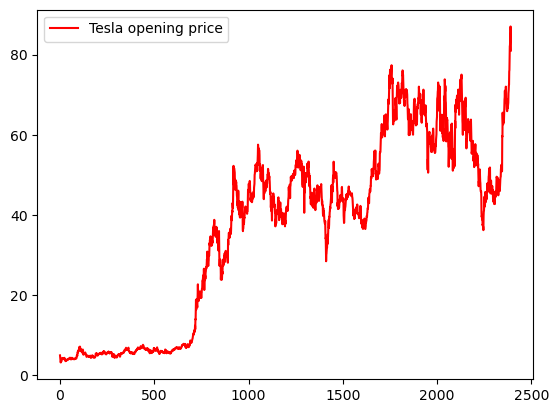

In [4]:
plt.plot(data, color='red', label='Tesla opening price')
plt.legend()

Now let’s split the data into training and testing sets, using the first 80% of the dataset as training and the newest 20% for testing

In [5]:
dataset_train = np.array(data[:int(data.shape[0]*0.8)])
dataset_test = np.array(data[int(data.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1913, 1)
(479, 1)


We will use the MinMaxScaler to scale the data between zero and one.

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)
print(dataset_train.shape)
print(dataset_test.shape)

(1913, 1)
(479, 1)


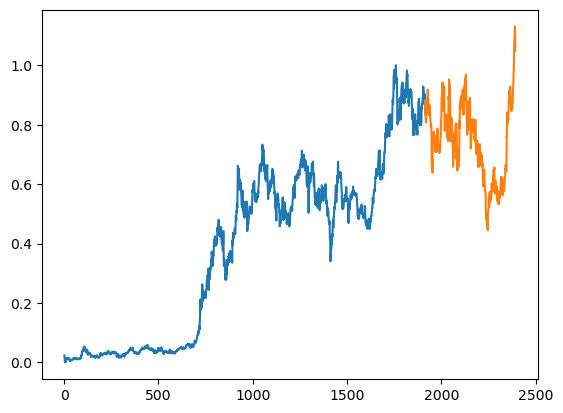

In [7]:
plt.plot(np.linspace(1,1913,1913),dataset_train)
plt.plot(np.linspace(1914,2392,479),dataset_test)
plt.show()

For the features (x), we will always append the last 10 prices, and for the label (y), we will append the next price. Then we will use numpy to convert it into an array.

So we are using a history of prior 10 days of stock market opens to try and predict the next day.

In [8]:
def create_dataset(df):
    x = []
    y = []
    for i in range(10, df.shape[0]):
        x.append(df[i-10:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

We create our training and testing data by calling our function for each one:

In [9]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [10]:
x_test.shape

(469, 10)

Next, we need to reshape our data to make it an array

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

RNN Model and its hyperparameters.

In [12]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [13]:
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2024-03-06 10:21:01.438920: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


60/60 [==============================] - 3s 18ms/step - loss: 0.0229
Epoch 2/50
60/60 [==============================] - 1s 18ms/step - loss: 0.0027
Epoch 3/50
60/60 [==============================] - 1s 18ms/step - loss: 0.0026
Epoch 4/50
60/60 [==============================] - 1s 18ms/step - loss: 0.0026
Epoch 5/50
60/60 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 6/50
60/60 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 7/50
60/60 [==============================] - 1s 18ms/step - loss: 0.0030
Epoch 8/50
60/60 [==============================] - 1s 18ms/step - loss: 0.0022
Epoch 9/50
60/60 [==============================] - 1s 18ms/step - loss: 0.0021
Epoch 10/50
60/60 [==============================] - 1s 18ms/step - loss: 0.0022
Epoch 11/50
60/60 [==============================] - 1s 18ms/step - loss: 0.0021
Epoch 12/50
60/60 [==============================] - 1s 19ms/step - loss: 0.0021
Epoch 13/50
60/60 [=============================

Now make predictions using the model

In [14]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions.shape)
y_pred_scaled = scaler.inverse_transform(predictions.reshape(-1, 1))

15/15 [==============================] - 1s 5ms/step
(469, 1)


We plot three graphs on the same plot: training data, test data, and prediction

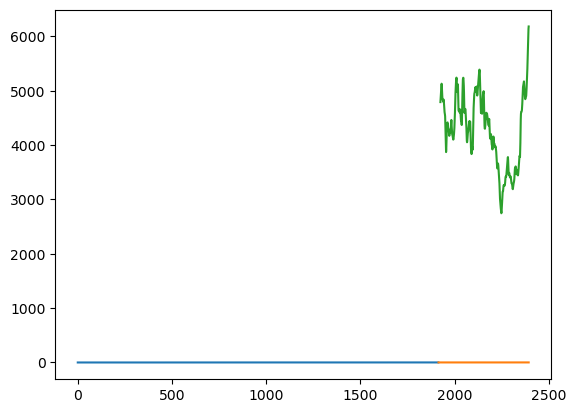

In [15]:
plt.plot(np.linspace(1,1913,1913),dataset_train)
plt.plot(np.linspace(1914,2392,479),dataset_test)
plt.plot(np.linspace(1924,2392,469),y_pred_scaled)
plt.show()

# Your turn: 

Play with the number of training days (currently set to 10). Also, if you are brave, try playing with the hyperparameters.